In [4]:
import pandas as pd
import sys
import os
import numpy 
import pylab as pl
from pandas.tools.plotting import scatter_matrix

import json
import os
s = json.load( open(os.getenv('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)



%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Anaconda3\lib\site-packages\matplotlib\__init__.py:855: UserWarning: svg.embed_char_paths is deprecated and replaced with svg.fonttype; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [5]:
allmales={}
allfemales={}
allmales['all']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_2_1_1.xls',header=9)
allmales['white']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_2_1_4.xls', header=9)
allmales['black']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_2_1_6.xls', header=9)
allmales['hispanic']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_2_1_9.xls', header=9)
allmales['asian']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_2_1_8.xls', header=9)
allfemales['all']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_3_1_1.xls', header=9)
allfemales['white']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_3_1_4.xls', header=9)
allfemales['black']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_3_1_6.xls', header=9)
allfemales['hispanic']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_3_1_9.xls', header=9)
allfemales['asian']=pd.read_excel(os.getenv('PUI2015')+'/data/pinc08_3_1_8.xls', header=9)

##exploratory phase

In [6]:
#Another way to remove non real entries, is to use the np.isreal command, 
#i end up doing it in a for loop, which is ugly.
#think about how you could improve on that if you already have coding experience
#and are used to pythonic ways!

for k in allmales:
    nonreal  = allmales[k].applymap(np.isreal)
    for c in allmales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allmales[k][c][~nonreal[c]] = np.float('NaN')
            allmales[k][c] = allmales[k][c].astype(float)

    

C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
#do the same for females
for k in allfemales:
    nonreal  = allfemales[k].applymap(np.isreal)
    for c in allfemales[k].columns :
        if nonreal.sum()[c]>1 and nonreal.sum()[c]<49:
            allfemales[k][c][~nonreal[c]] = np.float('NaN')
            allfemales[k][c] = allfemales[k][c].astype(float)


C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


##to see how the male and female income relate to each other plot the Total Median Income (from any source of revenue) of females vs the Total Median Income of males by race (one data point per race)

##also plot the 1-1 line: the diagonal that corresponds to men and women getting the same pay
(make the plot and describe it in a "caption" in the cell below the plot)

In [8]:
m = []
for k in allmales.keys():
    m.append(allmales[k]['Median income'][3])

f = []
for k in allfemales.keys():
    f.append(allfemales[k]['Median income'][3])

print (m)
print (f)

##pl.scatter[...]

[30686.0, 45950.0, 27017.0, 40298.0, 45554.0]
[26165.0, 31802.0, 21411.0, 28402.0, 30919.0]


#Now fit it with a line!
you can use statsmodels, or scipy, numpy, or create your own residual minimization function. 
if you want to use numpy (and you do not have to!) you can for example use 


pl.plot(newx,np.poly1d(np.ployfit(x,y,1))(newx)

to make and plot the fit in one line (although this way you did not save the parameters so you need to rerun the function to get the slope and intercept ... :-/

why not challenge yourself (if you want) and  create your own residual minimization function you can minimize it with scipy instead of a nested for loop (which is called 'brute force minimization')

from scipy.optimize import minimize

def line ().....
    #this would be a function that creates a line given parameters, like we did in class
    ...
    return y
def residuals(data, model, error=None):
    #you can add errors if you want
    you want to return the sum of the residuals (difference b/w data and model **2)
    return residuals

you need an initial guess for the parameters, where you start searching. it has to be a single variable, so for 2 parameters make a list of 2 elements. the numbers inside do not have to be 0 and 1 - but choose something not too crazy or your minimization will get lost!

p0 = [0,1] 

result = minimize(residuals, p0, args=(all_males, all_females))

in args i put all arguments of the function residuals that are not to be evaluated for the minimization (in this case the data)

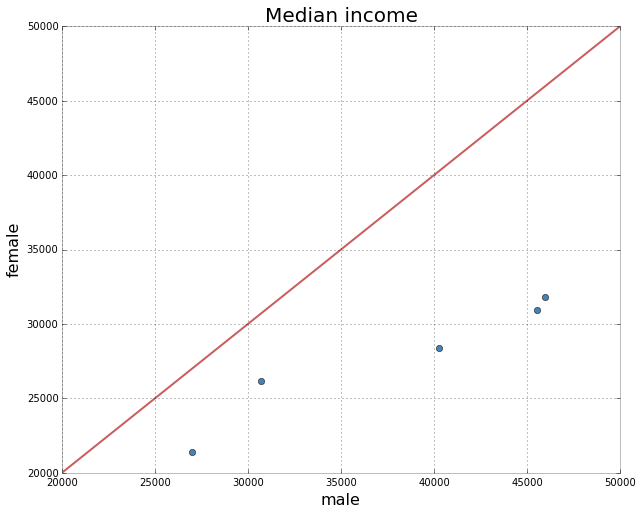

In [9]:
#fit and plot here
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (10,8))
plt.plot(m, f, 'o')
plt.plot((0,50000), (0,50000), '-')
plt.xlim(20000, 50000)
plt.ylim(20000, 50000)
plt.xlabel('male', fontsize = 16)
plt.ylabel('female', fontsize = 16)
plt.title(r'Median income', fontsize = 20)

##and plot the line corresponding to the analytical regression to compare it with the result of your numerical one

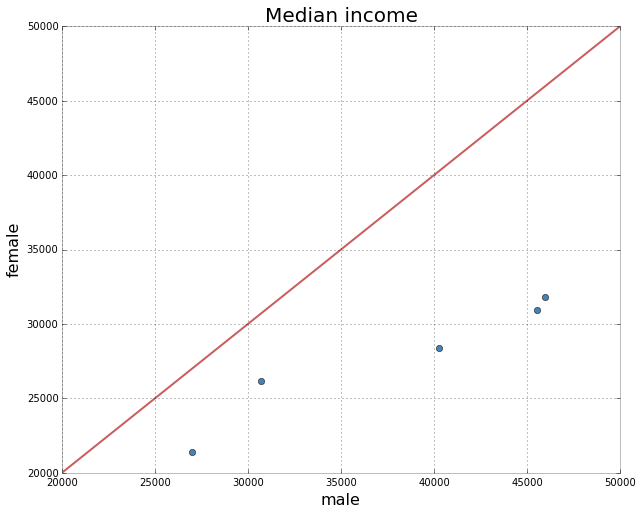

In [10]:
import statsmodels.api as sm

M = sm.add_constant(m)

plt.figure(figsize = (10,8))
plt.plot(m, f, 'o')
plt.plot((0,50000), (0,50000), '-')
plt.xlim(20000, 50000)
plt.ylim(20000, 50000)
plt.xlabel('male', fontsize = 16)
plt.ylabel('female', fontsize = 16)
plt.title(r'Median income', fontsize = 20)